Enter '1' for source-destination input or '2' for source-weight input: 1
Enter start location: A
Enter destination location: H
Shortest path from A to H is: ['A', 'B', 'H']


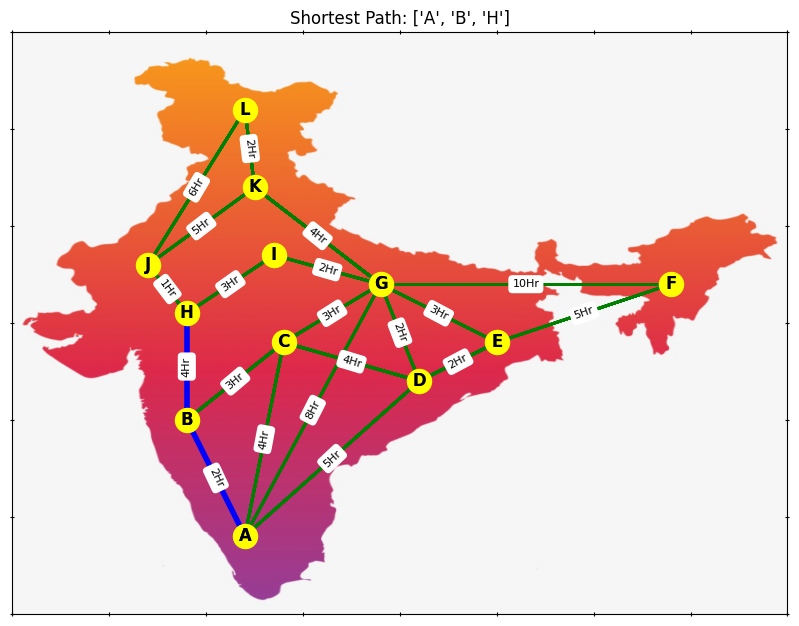

In [1]:
import networkx as nx
import heapq
import matplotlib.pyplot as plt
import requests
from PIL import Image
import io

def create_graph(nodes, edges):
    graph = nx.Graph()
    for node in nodes:
        graph.add_node(node['id'], name=node['name'], pos=(node['x'], node['y']))
    for edge in edges:
        graph.add_edge(edge['source'], edge['destination'], weight=int(edge['weight']))
    return graph

def dijkstra(graph, start, end):
    heap = [(0, start)]
    paths = {start: (None, 0)}

    while heap:
        (cost, current) = heapq.heappop(heap)
        if current == end:
            path = []
            while current is not None:
                path.append(current)
                current = paths[current][0]
            return path[::-1]

        if current not in paths:
            continue

        for neighbor, edge in graph[current].items():
            old_cost = paths.get(neighbor, (None, float('inf')))[1]
            new_cost = cost + graph[current][neighbor]['weight']

            if new_cost < old_cost:
                paths[neighbor] = (current, new_cost)
                heapq.heappush(heap, (new_cost, neighbor))

    return None
nodes = [
    {'id': 'A', 'name': 'A', 'x': 12, 'y': 4},
    {'id': 'B', 'name': 'B', 'x': 9, 'y': 10},
    {'id': 'C', 'name': 'C', 'x': 14, 'y': 14},
    {'id': 'D', 'name': 'D', 'x': 21, 'y': 12},
    {'id': 'E', 'name': 'E', 'x': 25, 'y': 14},
    {'id': 'F', 'name': 'F', 'x': 34, 'y': 17},
    {'id': 'G', 'name': 'G', 'x': 19, 'y': 17},
    {'id': 'H', 'name': 'H', 'x': 9, 'y': 15.5},
    {'id': 'I', 'name': 'I', 'x': 13.5, 'y': 18.5},
    {'id': 'J', 'name': 'J', 'x': 7, 'y': 18},
    {'id': 'K', 'name': 'K', 'x': 12.5, 'y': 22},
    {'id': 'L', 'name': 'L', 'x': 12, 'y': 26},


]
edges = [
    {'source': 'A', 'destination': 'B', 'weight': '2'},
    {'source': 'B', 'destination': 'C', 'weight': '3'},
    {'source': 'A', 'destination': 'C', 'weight': '4'},
    {'source': 'C', 'destination': 'D', 'weight': '4'},
    {'source': 'A', 'destination': 'D', 'weight': '5'},
    {'source': 'D', 'destination': 'E', 'weight': '2'},
    {'source': 'D', 'destination': 'G', 'weight': '2'},
    {'source': 'E', 'destination': 'G', 'weight': '3'},
    {'source': 'A', 'destination': 'G', 'weight': '8'},
    {'source': 'C', 'destination': 'G', 'weight': '3'},
    {'source': 'E', 'destination': 'F', 'weight': '5'},
    {'source': 'F', 'destination': 'G', 'weight': '10'},
    {'source': 'I', 'destination': 'G', 'weight': '2'},
    {'source': 'H', 'destination': 'I', 'weight': '3'},
    {'source': 'B', 'destination': 'H', 'weight': '4'},
    {'source': 'H', 'destination': 'J', 'weight': '1'},
    {'source': 'J', 'destination': 'K', 'weight': '5'},
    {'source': 'G', 'destination': 'K', 'weight': '4'},
    {'source': 'L', 'destination': 'K', 'weight': '2'},
    {'source': 'J', 'destination': 'L', 'weight': '6'},


]


def load_background_image(image_url):
    response = requests.get(image_url)
    if response.status_code == 200:
        image_content = io.BytesIO(response.content)
        image = Image.open(image_content)
        return image
    else:
        raise ValueError(f"Failed to fetch the image from URL: {image_url}")

# Usage of the load_background_image function
image_url = 'https://www.nicepng.com/png/detail/365-3655555_mintel-in-india-india-map-outline-png.png'  # Replace with your image URL
bg_img = load_background_image(image_url)

def get_shortest_path_with_weight(G, start_location, weight):
    destination_node = "Your requirement is not available."
    heap = [(0, start_location)]
    paths = {start_location: (None, 0)}

    while heap:
        (cost, current) = heapq.heappop(heap)
        if cost > int(weight):  # Stop if the cost exceeds the given weight
            break

        if current != start_location and cost == int(weight):  # Found node at required weight
            destination_node = current
            break

        for neighbor, edge in G[current].items():
            old_cost = paths.get(neighbor, (None, float('inf')))[1]
            new_cost = cost + G[current][neighbor]['weight']

            if new_cost < old_cost:
                paths[neighbor] = (current, new_cost)
                heapq.heappush(heap, (new_cost, neighbor))

    return destination_node
def plot_graph_with_bg(graph, all_paths, shortest_path):
    fig, ax = plt.subplots(figsize=(10, 8))

    ax.imshow(bg_img, extent=[0, 40, 0, 30])

    pos = nx.get_node_attributes(graph, 'pos')
    nx.draw(graph, pos, with_labels=True, node_size=300, node_color='yellow', font_weight='bold', ax=ax)
    nx.draw_networkx_labels(graph, pos, labels={node: graph.nodes[node]['name'] for node in graph.nodes()}, ax=ax)
    nx.draw_networkx_edges(graph, pos, ax=ax)

    for path in all_paths:
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='green', width=2, ax=ax)

    path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='blue', width=4, ax=ax)

    edge_labels = {(edge[0], edge[1]): f"{graph.edges[edge]['weight']}Hr" for edge in graph.edges()}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='black', font_size=8, ax=ax)

    ax.axis('on')
    ax.tick_params(axis='both', which='both', direction='inout', bottom=True, top=True, left=True, right=True)
    plt.title(f"Shortest Path: {shortest_path}")
    plt.grid(False)
    plt.show()

def get_shortest_path(G, start, end):
    return nx.shortest_path(G, start, end)

if __name__ == '__main__':
    G = create_graph(nodes, edges)


    user_choice = input("Enter '1' for source-destination input or '2' for source-weight input: ")

if user_choice == '1':
    start_location = input("Enter start location: ")
    destination_location = input("Enter destination location: ")
    all_paths = nx.all_simple_paths(G, start_location, destination_location)
    all_paths = [path for path in all_paths]
    shortest_path = dijkstra(G, start_location, destination_location)
    if shortest_path:
        print(f"Shortest path from {start_location} to {destination_location} is: {shortest_path}")
        plot_graph_with_bg(G, all_paths, shortest_path)
    else:
        print(f"No path found from {start_location} to {destination_location}.")

elif user_choice == '2':
    start_location = input("Enter start location: ")
    weight = input("Enter Time in Hrs : ")
    all_paths = []
    for node in G.nodes():
        path = dijkstra(G, start_location, node)
        if path and sum(G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)) <= int(weight):
            all_paths.append(path)
    shortest_path = dijkstra(G, start_location, get_shortest_path_with_weight(G, start_location, weight))
    if shortest_path:
        print(f"Shortest path from {start_location} to {get_shortest_path_with_weight(G, start_location, weight)} with weight {weight} is: {shortest_path}")
        plot_graph_with_bg(G, all_paths, shortest_path)
    else:
        print(f"No path found from {start_location} to {get_shortest_path_with_weight(G, start_location, weight)}.")

else:
    print("Invalid choice. Please enter '1' or '2'.")


Enter '1' for source-destination input or '2' for source-weight input: 2
Enter start location: A
Enter Time in Hrs : 8
Shortest path from A to G with weight 8 is: ['A', 'C', 'G']


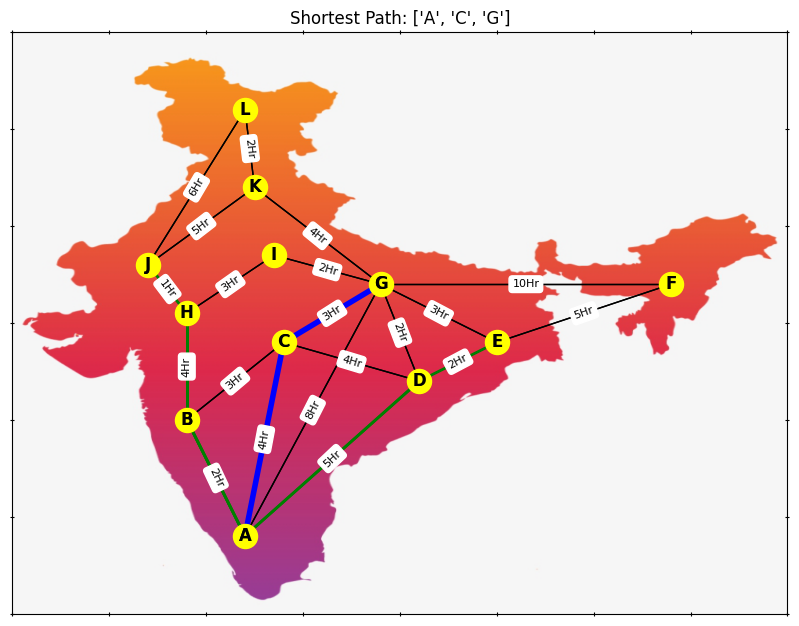

In [2]:
import networkx as nx
import heapq
import matplotlib.pyplot as plt
import requests
from PIL import Image
import io

def create_graph(nodes, edges):
    graph = nx.Graph()
    for node in nodes:
        graph.add_node(node['id'], name=node['name'], pos=(node['x'], node['y']))
    for edge in edges:
        graph.add_edge(edge['source'], edge['destination'], weight=int(edge['weight']))
    return graph

def dijkstra(graph, start, end):
    heap = [(0, start)]
    paths = {start: (None, 0)}

    while heap:
        (cost, current) = heapq.heappop(heap)
        if current == end:
            path = []
            while current is not None:
                path.append(current)
                current = paths[current][0]
            return path[::-1]

        if current not in paths:
            continue

        for neighbor, edge in graph[current].items():
            old_cost = paths.get(neighbor, (None, float('inf')))[1]
            new_cost = cost + graph[current][neighbor]['weight']

            if new_cost < old_cost:
                paths[neighbor] = (current, new_cost)
                heapq.heappush(heap, (new_cost, neighbor))

    return None
nodes = [
    {'id': 'A', 'name': 'A', 'x': 12, 'y': 4},
    {'id': 'B', 'name': 'B', 'x': 9, 'y': 10},
    {'id': 'C', 'name': 'C', 'x': 14, 'y': 14},
    {'id': 'D', 'name': 'D', 'x': 21, 'y': 12},
    {'id': 'E', 'name': 'E', 'x': 25, 'y': 14},
    {'id': 'F', 'name': 'F', 'x': 34, 'y': 17},
    {'id': 'G', 'name': 'G', 'x': 19, 'y': 17},
    {'id': 'H', 'name': 'H', 'x': 9, 'y': 15.5},
    {'id': 'I', 'name': 'I', 'x': 13.5, 'y': 18.5},
    {'id': 'J', 'name': 'J', 'x': 7, 'y': 18},
    {'id': 'K', 'name': 'K', 'x': 12.5, 'y': 22},
    {'id': 'L', 'name': 'L', 'x': 12, 'y': 26},


]
edges = [
    {'source': 'A', 'destination': 'B', 'weight': '2'},
    {'source': 'B', 'destination': 'C', 'weight': '3'},
    {'source': 'A', 'destination': 'C', 'weight': '4'},
    {'source': 'C', 'destination': 'D', 'weight': '4'},
    {'source': 'A', 'destination': 'D', 'weight': '5'},
    {'source': 'D', 'destination': 'E', 'weight': '2'},
    {'source': 'D', 'destination': 'G', 'weight': '2'},
    {'source': 'E', 'destination': 'G', 'weight': '3'},
    {'source': 'A', 'destination': 'G', 'weight': '8'},
    {'source': 'C', 'destination': 'G', 'weight': '3'},
    {'source': 'E', 'destination': 'F', 'weight': '5'},
    {'source': 'F', 'destination': 'G', 'weight': '10'},
    {'source': 'I', 'destination': 'G', 'weight': '2'},
    {'source': 'H', 'destination': 'I', 'weight': '3'},
    {'source': 'B', 'destination': 'H', 'weight': '4'},
    {'source': 'H', 'destination': 'J', 'weight': '1'},
    {'source': 'J', 'destination': 'K', 'weight': '5'},
    {'source': 'G', 'destination': 'K', 'weight': '4'},
    {'source': 'L', 'destination': 'K', 'weight': '2'},
    {'source': 'J', 'destination': 'L', 'weight': '6'},


]


def load_background_image(image_url):
    response = requests.get(image_url)
    if response.status_code == 200:
        image_content = io.BytesIO(response.content)
        image = Image.open(image_content)
        return image
    else:
        raise ValueError(f"Failed to fetch the image from URL: {image_url}")

# Usage of the load_background_image function
image_url = 'https://www.nicepng.com/png/detail/365-3655555_mintel-in-india-india-map-outline-png.png'  # Replace with your image URL
bg_img = load_background_image(image_url)

def get_shortest_path_with_weight(G, start_location, weight):
    destination_node = "Your requirement is not available."
    heap = [(0, start_location)]
    paths = {start_location: (None, 0)}

    while heap:
        (cost, current) = heapq.heappop(heap)
        if cost > int(weight):  # Stop if the cost exceeds the given weight
            break

        if current != start_location and cost == int(weight):  # Found node at required weight
            destination_node = current
            break

        for neighbor, edge in G[current].items():
            old_cost = paths.get(neighbor, (None, float('inf')))[1]
            new_cost = cost + G[current][neighbor]['weight']

            if new_cost < old_cost:
                paths[neighbor] = (current, new_cost)
                heapq.heappush(heap, (new_cost, neighbor))

    return destination_node
def plot_graph_with_bg(graph, all_paths, shortest_path):
    fig, ax = plt.subplots(figsize=(10, 8))

    ax.imshow(bg_img, extent=[0, 40, 0, 30])

    pos = nx.get_node_attributes(graph, 'pos')
    nx.draw(graph, pos, with_labels=True, node_size=300, node_color='yellow', font_weight='bold', ax=ax)
    nx.draw_networkx_labels(graph, pos, labels={node: graph.nodes[node]['name'] for node in graph.nodes()}, ax=ax)
    nx.draw_networkx_edges(graph, pos, ax=ax)

    for path in all_paths:
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='green', width=2, ax=ax)

    path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='blue', width=4, ax=ax)

    edge_labels = {(edge[0], edge[1]): f"{graph.edges[edge]['weight']}Hr" for edge in graph.edges()}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='black', font_size=8, ax=ax)

    ax.axis('on')
    ax.tick_params(axis='both', which='both', direction='inout', bottom=True, top=True, left=True, right=True)
    plt.title(f"Shortest Path: {shortest_path}")
    plt.grid(False)
    plt.show()

def get_shortest_path(G, start, end):
    return nx.shortest_path(G, start, end)

if __name__ == '__main__':
    G = create_graph(nodes, edges)


    user_choice = input("Enter '1' for source-destination input or '2' for source-weight input: ")

if user_choice == '1':
    start_location = input("Enter start location: ")
    destination_location = input("Enter destination location: ")
    all_paths = nx.all_simple_paths(G, start_location, destination_location)
    all_paths = [path for path in all_paths]
    shortest_path = dijkstra(G, start_location, destination_location)
    if shortest_path:
        print(f"Shortest path from {start_location} to {destination_location} is: {shortest_path}")
        plot_graph_with_bg(G, all_paths, shortest_path)
    else:
        print(f"No path found from {start_location} to {destination_location}.")

elif user_choice == '2':
    start_location = input("Enter start location: ")
    weight = input("Enter Time in Hrs : ")
    all_paths = []
    for node in G.nodes():
        path = dijkstra(G, start_location, node)
        if path and sum(G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)) <= int(weight):
            all_paths.append(path)
    shortest_path = dijkstra(G, start_location, get_shortest_path_with_weight(G, start_location, weight))
    if shortest_path:
        print(f"Shortest path from {start_location} to {get_shortest_path_with_weight(G, start_location, weight)} with weight {weight} is: {shortest_path}")
        plot_graph_with_bg(G, all_paths, shortest_path)
    else:
        print(f"No path found from {start_location} to {get_shortest_path_with_weight(G, start_location, weight)}.")

else:
    print("Invalid choice. Please enter '1' or '2'.")
